# Experiment 7

#### Problem Statement: 
Implement the priority scheduling.

#### Code: 

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

##### Non-Premeptive Priority Scheduling

In [2]:
# function to generate gantt chart for non-premptive priority scheduling
def generate_priority_gantt_chart_non_preemptive(process, priority):
    df = pd.DataFrame({'Process': process, 'Priority': priority})
    df.sort_values('Priority', inplace=True)
    current_time = 0
    gantt_chart = []

    for index, row in df.iterrows():
        proc = row['Process']
        prio = row['Priority']

        gantt_chart.append((proc, current_time, current_time + prio))
        current_time += prio

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 1)
    for process, start, end in gantt_chart:
        ax.broken_barh([(start, end - start)], (0, 1),
                       facecolors="orange", edgecolor="black")
        ax.text((start + end) / 2, 0.5, process,
                ha='center', va='center', color="black")

    ax.set_yticks([])
    ax.set_xticks(np.arange(0, current_time + 1, 1))
    ax.set_xlabel("Time")
    plt.title("Non-Preemptive Priority Gantt Chart")
    plt.show()    

In [3]:
# function to compute waiting time of all processes for non-preemptive priority scheduling
def compute_priority_waiting_time_non_preemptive(process, burst_time, priority):
    df = pd.DataFrame(
        {'Process': process, 'BurstTime': burst_time, 'Priority': priority})
    df_sorted = df.sort_values(by='Priority')
    df_sorted = df_sorted.reset_index(drop=True)
    df_sorted['WaitingTime'] = 0

    for i in range(1, len(df_sorted)):
        df_sorted.loc[i, 'WaitingTime'] = df_sorted.loc[i - 1,
                                                        'BurstTime'] + df_sorted.loc[i - 1, 'WaitingTime']

    return dict(zip(df_sorted['Process'], df_sorted['WaitingTime']))

In [4]:
# function to turn around time of all processes for non-preemptive priority scheduling
def compute_priority_turnaround_time_non_preemptive(process, burst_time, priority):
    n = len(process)
    df = pd.DataFrame(
        {'Process': process, 'BurstTime': burst_time, 'Priority': priority})
    df_sorted = df.sort_values(by='Priority')
    df_sorted = df_sorted.reset_index(drop=True)

    waiting_time = [0] * n
    turnaround_time = [0] * n

    waiting_time[0] = 0
    for i in range(1, n):
        waiting_time[i] = df_sorted.loc[i - 1, 'BurstTime'] + waiting_time[i-1]

    for i in range(n):
        turnaround_time[i] = df_sorted.loc[i, 'BurstTime'] + waiting_time[i]

    return dict(zip(df_sorted['Process'], turnaround_time))

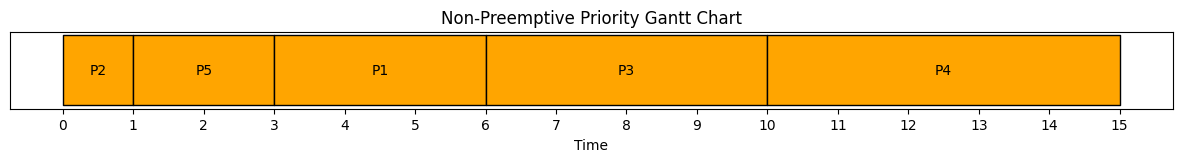

|    | Process   |   BurstTime |   Priority |   WaitingTime |   TurnAroundTime |
|---:|:----------|------------:|-----------:|--------------:|-----------------:|
|  0 | P1        |          10 |          3 |             0 |                1 |
|  1 | P2        |           1 |          1 |             1 |                6 |
|  2 | P3        |           2 |          4 |             6 |               16 |
|  3 | P4        |           1 |          5 |            16 |               18 |
|  4 | P5        |           5 |          2 |            18 |               19 |

Average Waiting Time:  8.2 milliseconds

Average Turnaround Time:  12.0 milliseconds



In [5]:
# defining the processes, burst time and priority
process = ['P1', 'P2', 'P3', 'P4', 'P5']
burst_time = [10, 1, 2, 1, 5]
priority = [3, 1, 4, 5, 2]


# generating gantt chart for priority scheduling
generate_priority_gantt_chart_non_preemptive(process, priority)


# computing waiting time of all processes
waiting_time = compute_priority_waiting_time_non_preemptive(
    process, burst_time, priority)

# computing turnaround time of all processes
turn_around_time = compute_priority_turnaround_time_non_preemptive(
    process, burst_time, priority)

# generating dataframe for with waiting time and turnaround time
df = pd.DataFrame({'Process': process, 'BurstTime': burst_time, 'Priority': priority,
                   'WaitingTime': list(waiting_time.values()),
                   'TurnAroundTime': list(turn_around_time.values())})
print(df.to_markdown(), end="\n\n")


# computing and printing average waiting time
print("Average Waiting Time: ", df['WaitingTime'].mean(), "milliseconds\n")

# computing and printing average turnaround time
print("Average Turnaround Time: ",
      df['TurnAroundTime'].mean(), "milliseconds\n")

##### Premeptive Priority Scheduling

In [6]:
class Process:
    def __init__(self, name, arrival_time, burst_time, priority):
        self.name = name
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority
        self.remaining_time = burst_time

def non_preemptive_priority_scheduling(processes):
    processes.sort(key=lambda x: (x.priority, x.arrival_time))
    n = len(processes)
    completion_time = [0] * n
    turnaround_time = [0] * n
    waiting_time = [0] * n

    for i in range(n):
        if i == 0:
            completion_time[i] = processes[i].arrival_time + processes[i].burst_time
        else:
            completion_time[i] = max(processes[i].arrival_time, completion_time[i - 1]) + processes[i].burst_time

        turnaround_time[i] = completion_time[i] - processes[i].arrival_time
        waiting_time[i] = turnaround_time[i] - processes[i].burst_time

    total_waiting_time = sum(waiting_time)
    avg_waiting_time = total_waiting_time / n

    print("Non-preemptive Priority Scheduling:")
    print("Process\tArrival Time\tBurst Time\tPriority\tCompletion Time\tTurnaround Time\tWaiting Time")
    for i in range(n):
        p = processes[i]
        print(f"{p.name}\t{p.arrival_time}\t\t{p.burst_time}\t\t{p.priority}\t\t{completion_time[i]}\t\t{turnaround_time[i]}\t\t{waiting_time[i]}")
    print(f"Average Waiting Time: {avg_waiting_time:.2f}")

def preemptive_priority_scheduling(processes):
    n = len(processes)
    current_time = 0
    completion_time = [0] * n
    turnaround_time = [0] * n
    waiting_time = [0] * n

    while True:
        remaining_processes = [p for p in processes if p.remaining_time > 0 and p.arrival_time <= current_time]

        if not remaining_processes:
            break

        highest_priority_process = min(remaining_processes, key=lambda x: x.priority)
        index = processes.index(highest_priority_process)

        processes[index].remaining_time -= 1
        current_time += 1

        if processes[index].remaining_time == 0:
            completion_time[index] = current_time
            turnaround_time[index] = completion_time[index] - processes[index].arrival_time
            waiting_time[index] = turnaround_time[index] - processes[index].burst_time

    total_waiting_time = sum(waiting_time)
    avg_waiting_time = total_waiting_time / n

    print("\nPreemptive Priority Scheduling:")
    print("Process\tArrival Time\tBurst Time\tPriority\tCompletion Time\tTurnaround Time\tWaiting Time")
    for i in range(n):
        p = processes[i]
        print(f"{p.name}\t{p.arrival_time}\t\t{p.burst_time}\t\t{p.priority}\t\t{completion_time[i]}\t\t{turnaround_time[i]}\t\t{waiting_time[i]}")
    print(f"Average Waiting Time: {avg_waiting_time:.2f}")

if __name__ == "__main__":
    processes = [
        Process("P1", 0, 4, 2),
        Process("P2", 1, 3, 1),
        Process("P3", 2, 1, 3),
        Process("P4", 3, 2, 4)
    ]

    non_preemptive_priority_scheduling(processes)
    preemptive_priority_scheduling(processes)

Non-preemptive Priority Scheduling:
Process	Arrival Time	Burst Time	Priority	Completion Time	Turnaround Time	Waiting Time
P2	1		3		1		4		3		0
P1	0		4		2		8		8		4
P3	2		1		3		9		7		6
P4	3		2		4		11		8		6
Average Waiting Time: 4.00

Preemptive Priority Scheduling:
Process	Arrival Time	Burst Time	Priority	Completion Time	Turnaround Time	Waiting Time
P2	1		3		1		4		3		0
P1	0		4		2		7		7		3
P3	2		1		3		8		6		5
P4	3		2		4		10		7		5
Average Waiting Time: 3.25
